In [1]:
%pwd

'/home/xupb/scRNA_data/mouse_pfc/manuscripts/scanpy'

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import loompy
#print(loompy.__version__)
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

/home/xupb/anaconda3/envs/myenv/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [3]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

scanpy==1.6.0 anndata==0.7.4 umap==0.3.10 numpy==1.17.0 scipy==1.4.1 pandas==1.1.3 scikit-learn==0.23.1 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.7.0


In [4]:
sc.settings.set_figure_params(dpi=80, frameon=False,fontsize=10,dpi_save=300,format='pdf')  # low dpi (dots per inch) yields small inline figures
plt.rcParams['font.sans-serif']=['Arial']
plt.rcParams['pdf.fonttype'] = 'truetype'

In [10]:
## read loom file for first time, next time, load h5ad file

#adata=sc.read_loom('/home/xupb/scRNA_data/mouse_pfc/manuscripts/barcode_projection/pfc.bar.sub.loom')

/home/xupb/anaconda3/envs/myenv/lib/python3.7/site-packages/loompy/loom_layer.py:123: RuntimeWarning: invalid value encountered in not_equal
  nonzeros = np.where(vals != 0)


In [99]:
adata=sc.read_loom('/home/xupb/scRNA_data/mouse_pfc/manuscripts/scanpy/pfc.bar.sub.loom')

In [100]:
results_file = 'pfc.bar.sub_from_loom.h5ad'
adata.write(results_file) 

/home/xupb/anaconda3/envs/myenv/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'facs' as categorical
... storing 'orig.ident' as categorical
... storing 'sample' as categorical


In [5]:
results_file = './write/pfc.bar.sub.h5ad'
adata.write(results_file) 

NameError: name 'adata' is not defined

In [70]:
adata=sc.read_h5ad('/home/xyz2020/pfc.bar.sub.h5ad')

In [102]:
adata

AnnData object with n_obs × n_vars = 3183 × 18224
    obs: 'G2M.Score', 'Phase', 'S.Score', 'facs', 'nCount_RNA', 'nCount_bar', 'nFeature_RNA', 'nFeature_bar', 'old.ident', 'orig.ident', 'percent.mt', 'percent.rp', 'sample'
    layers: 'counts'

In [18]:
meta_binary_cluster=pd.read_csv('/home/xupb/scRNA_data/mouse_pfc/manuscripts/scanpy/meta_binary.csv',
                       index_col=0)

In [20]:
meta_binary_cluster

,orig.ident,nCount_RNA,nFeature_RNA,sample,facs,percent.mt,percent.rp,S.Score,G2M.Score,Phase,old.ident,nCount_bar,nFeature_bar,binary,binary_cluster
pfc_1_AAACCCAAGTCGTTAC,pfc_1,23146,5913,pfc_1,unsort,7.226117,5.858316,-0.001982,0.077728,G2M,G2M,2143,2,DMS+AI,DMS+AI
pfc_1_AAAGGGCGTGGCATCC,pfc_1,16099,4990,pfc_1,unsort,9.200893,6.142201,-0.042829,0.052758,G2M,G2M,51,1,AI,AI
pfc_1_AACCCAATCCGCTTAC,pfc_1,27543,6312,pfc_1,unsort,5.907739,4.206862,-0.017942,-0.000263,G1,G2M,379,1,AI,AI
pfc_1_AAGAACAAGAGAGCCT,pfc_1,23571,5829,pfc_1,unsort,6.919652,5.736697,-0.184875,0.032139,G2M,G2M,197,2,DMS+AI,DMS+AI
pfc_1_AATTTCCCACATTACG,pfc_1,27357,6632,pfc_1,unsort,7.280631,4.427559,-0.062008,-0.093389,G1,G1,237,2,DMS+AI,DMS+AI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pfc_4_TGATGGTGTAACCCGC,pfc_4,24915,6048,pfc_4,sort,2.442938,4.990172,-0.028208,-0.106318,G1,G1,155,1,LH,LH
pfc_4_TGCGGGTGTTCAAGTC,pfc_4,33644,6812,pfc_4,sort,2.647452,5.354331,-0.029752,-0.056486,G1,G1,185,1,LH,LH
pfc_4_TGGATGTTCCTTCTTC,pfc_4,40890,7223,pfc_4,sort,2.051345,4.124694,-0.054205,-0.040576,G1,G1,157,1,LH,LH
pfc_4_TGTGGCGAGTGGCCTC,pfc_4,35782,6837,pfc_4,sort,2.126055,5.271833,0.124812,0.009869,S,S,141,1,LH,LH


In [9]:
with open('/home/xupb/scRNA_data/mouse_pfc/manuscripts/scanpy/top10_degs.txt', 'r') as f:
    degs = f.read().splitlines()

In [103]:
adata.obs['binary']=meta_binary_cluster['binary']

In [104]:
adata.obs['binary'].astype('category')

pfc_1_AAACCCAAGTCGTTAC    DMS+AI
pfc_1_AAAGGGCGTGGCATCC        AI
pfc_1_AACCCAATCCGCTTAC        AI
pfc_1_AAGAACAAGAGAGCCT    DMS+AI
pfc_1_AATTTCCCACATTACG    DMS+AI
                           ...  
pfc_4_TGATGGTGTAACCCGC        LH
pfc_4_TGCGGGTGTTCAAGTC        LH
pfc_4_TGGATGTTCCTTCTTC        LH
pfc_4_TGTGGCGAGTGGCCTC        LH
pfc_4_TTTCAGTCAGACACCC        LH
Name: binary, Length: 3183, dtype: category
Categories (10, object): ['AI', 'BLA', 'DMS', 'DMS+AI', ..., 'DMS+MD', 'LH', 'MD', 'MD+LH']

In [105]:
sc.pl.pca(adata,color='binary')

/home/xupb/anaconda3/envs/myenv/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'binary' as categorical


KeyError: "Could not find entry in `obsm` for 'pca'.\nAvailable keys are: []."

In [106]:
adata.obs['binary'].cat.categories

Index(['AI', 'BLA', 'DMS', 'DMS+AI', 'DMS+BLA', 'DMS+LH', 'DMS+MD', 'LH', 'MD',
       'MD+LH'],
      dtype='object')

In [107]:
adata.obs['binary'].cat.reorder_categories(["DMS+MD","DMS+BLA","DMS+LH" ,"MD+LH","DMS+AI","LH","BLA","MD","DMS","AI"], inplace = True)

In [108]:
adata.uns['binary_colors']=["#FAD510","#ED0000FF","#42B540FF","#0099B4FF","#9986A5",
          "#FDAF91FF","#CCBA72","#ADB6B6FF","#5050FFFF",'#ABDDDE']

In [109]:
sc.tl.dendrogram(adata,var_names=degs,groupby='binary')

/home/xupb/anaconda3/envs/myenv/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


Storing dendrogram info using `.uns["dendrogram_['binary']"]`


In [110]:
adata

AnnData object with n_obs × n_vars = 3183 × 18224
    obs: 'G2M.Score', 'Phase', 'S.Score', 'facs', 'nCount_RNA', 'nCount_bar', 'nFeature_RNA', 'nFeature_bar', 'old.ident', 'orig.ident', 'percent.mt', 'percent.rp', 'sample', 'binary'
    uns: 'binary_colors', "dendrogram_['binary']"
    layers: 'counts'

         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50


/home/xupb/anaconda3/envs/myenv/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:54)
Storing dendrogram info using `.uns['dendrogram_binary']`


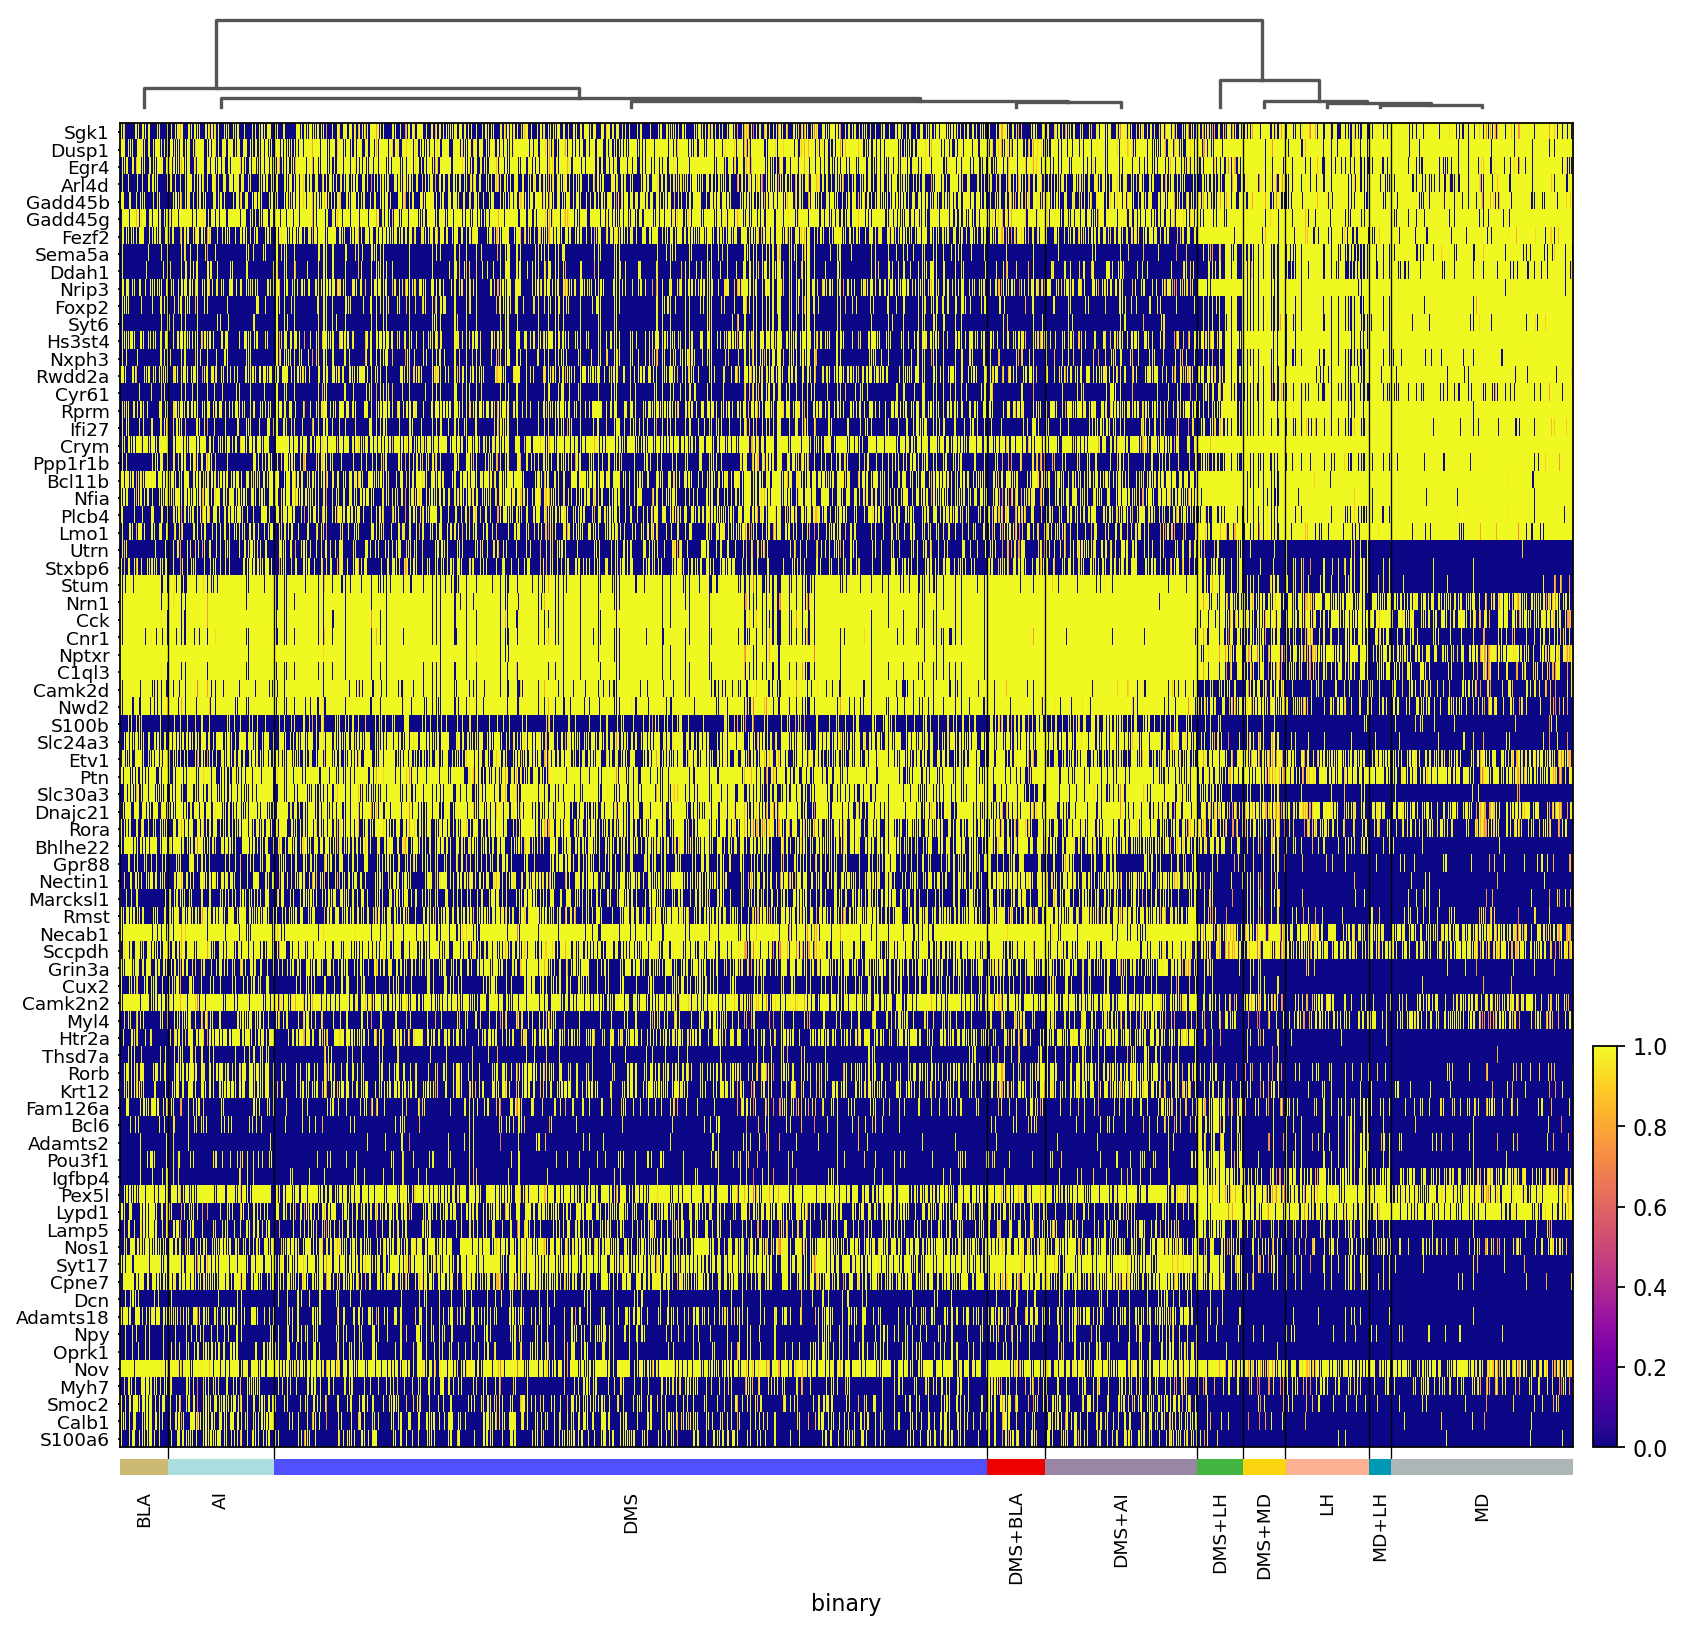

In [111]:
ax = sc.pl.heatmap(adata,degs,figsize=(12,12),
                   vmin=0, vmax=1,cmap='plasma',dendrogram=True,show_gene_labels=True,swap_axes=True,var_group_rotation=45,#p
                   groupby='binary',
                   #save=' top100 deg same color with pca.pdf'
                  )#

In [112]:
proj_sub_1=adata[adata.obs['binary'].isin(['DMS','LH','DMS+LH'])].copy()

/home/xupb/anaconda3/envs/myenv/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [113]:
proj_sub_1

AnnData object with n_obs × n_vars = 1846 × 18224
    obs: 'G2M.Score', 'Phase', 'S.Score', 'facs', 'nCount_RNA', 'nCount_bar', 'nFeature_RNA', 'nFeature_bar', 'old.ident', 'orig.ident', 'percent.mt', 'percent.rp', 'sample', 'binary'
    uns: 'binary_colors', "dendrogram_['binary']", 'dendrogram_binary'
    obsm: 'X_pca'
    layers: 'counts'

/home/xupb/anaconda3/envs/myenv/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


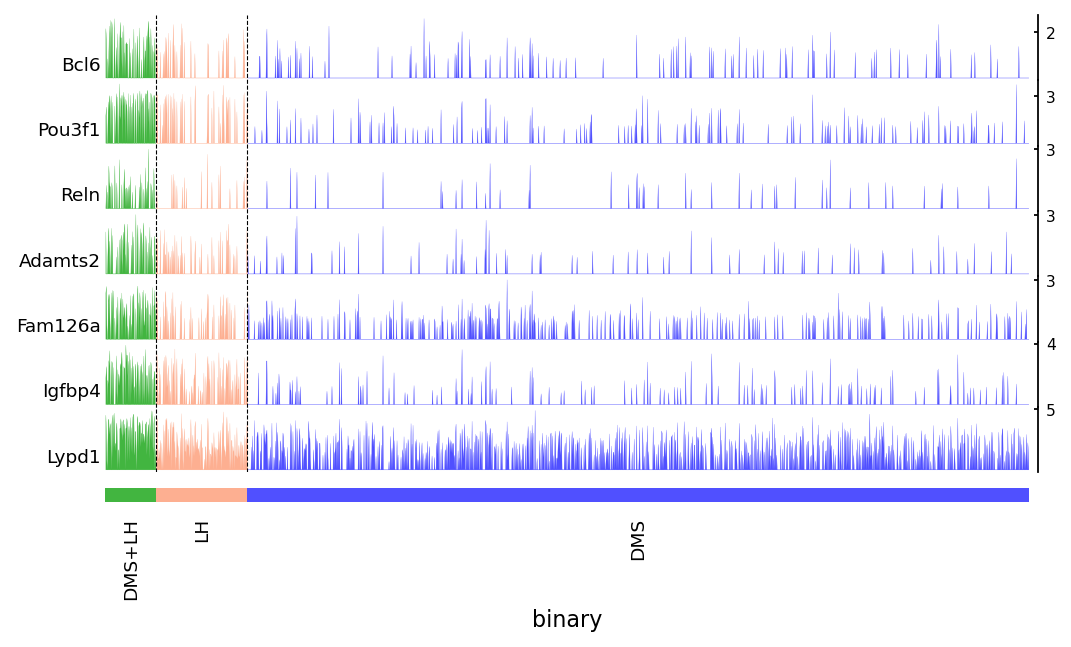

In [114]:
marker_genes=['Bcl6','Pou3f1','Reln','Adamts2','Fam126a','Igfbp4','Lypd1',
              #'Scube1','Pou3f1'
             #'Cck','Marcksl1','Cux1','Satb2','Tbr1'
             ]

    
ax = sc.pl.tracksplot(proj_sub_1,marker_genes,swap_axes=True,
                      figsize=(8,4),
                      groupby='binary',title='Binary Projection',
                      #save='DMS+LH specific genes.pdf'
                     )

In [115]:
proj_sub_2=adata[adata.obs['binary'].isin(['DMS','MD','DMS+MD'])].copy()

/home/xupb/anaconda3/envs/myenv/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [118]:
proj_sub_2

AnnData object with n_obs × n_vars = 2053 × 18224
    obs: 'G2M.Score', 'Phase', 'S.Score', 'facs', 'nCount_RNA', 'nCount_bar', 'nFeature_RNA', 'nFeature_bar', 'old.ident', 'orig.ident', 'percent.mt', 'percent.rp', 'sample', 'binary'
    uns: 'binary_colors', "dendrogram_['binary']", 'dendrogram_binary'
    obsm: 'X_pca'
    layers: 'counts'

/home/xupb/anaconda3/envs/myenv/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


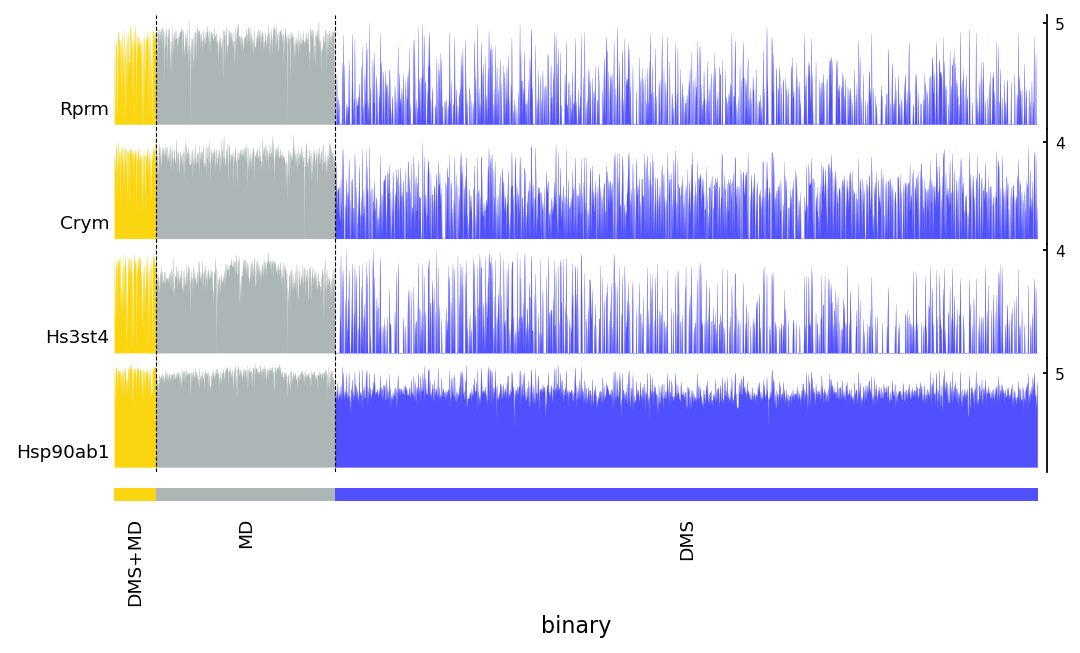

In [122]:
marker_genes=['Rprm','Crym','Hs3st4','Hsp90ab1'
             ]

    
ax = sc.pl.tracksplot(proj_sub_2,marker_genes,swap_axes=True,
                      figsize=(8,4),
                      groupby='binary',title='Binary Projection',
                      save='DMS+MD specific genes.pdf'
                     )

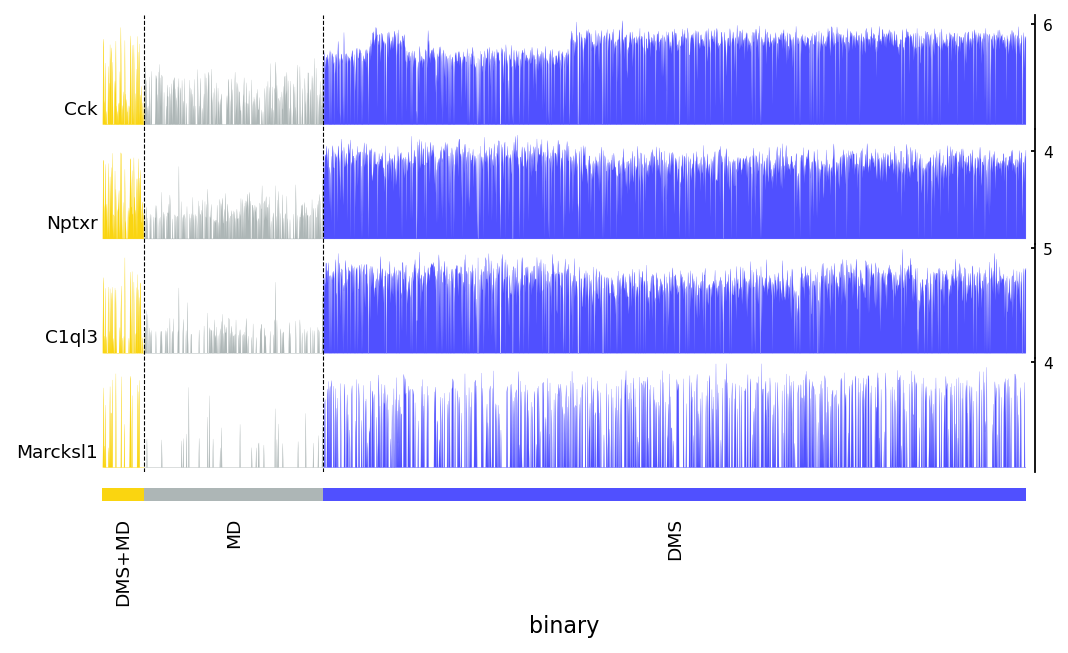

In [95]:
marker_genes=['Cck','Nptxr','C1ql3','Marcksl1'
             ]

    
ax = sc.pl.tracksplot(proj_sub_2,marker_genes,swap_axes=True,
                      figsize=(8,4),
                      groupby='binary',title='Binary Projection',
                      #save='DMS+MD specific genes.pdf'
                     )

In [28]:
proj_sub_2=adata[adata.obs['binary'].isin(['DMS','BLA','DMS+BLA'])].copy()

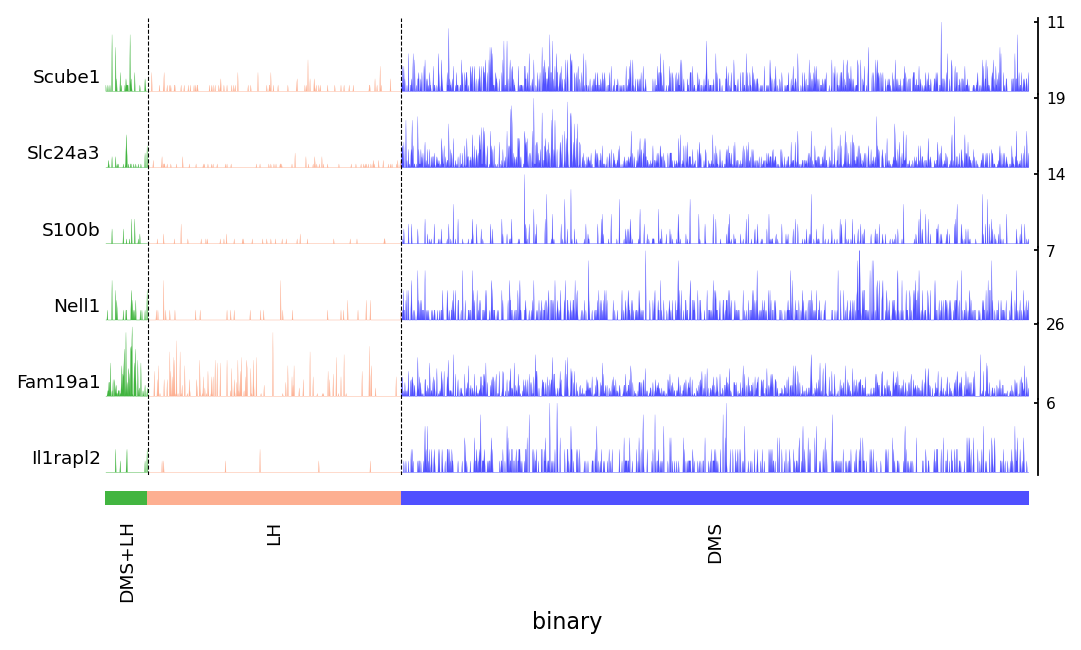

In [29]:
marker_genes=['Scube1','Slc24a3','S100b','Nell1','Fam19a1','Il1rapl2'
             
             ]

    
ax = sc.pl.tracksplot(proj_sub_1,marker_genes,swap_axes=True,
                      figsize=(8,4),
                      groupby='binary',title='Binary Projection',
                      #save='DMS+LH specific genes.pdf'
                     )
